<p style="text-align: center;"><img src="https://lms.techproeducation.com/pluginfile.php/1/theme_edumy/headerlogo2/1663129929/logo.png" class="img-fluid" alt="CLRSWY"></p>

# WITH SEABORN

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Box and Swarm Plots in kill data
1. Most dangerous cities
1. Most dangerous states
1. Having mental ilness or not for killed people
1. Threat types
1. Flee types
<br>

## read data

if didn't work you can use this parameters: encoding="windows-1252"

In [4]:
df_kill = pd.read_csv("PoliceKillingsUS.csv",  encoding="windows-1252")
df_kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


## Shape

In [5]:
df_kill.shape

(2535, 14)

## 1a: Box plot of age in both genders separeted by manner of death.

In [6]:
df_kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

#### INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

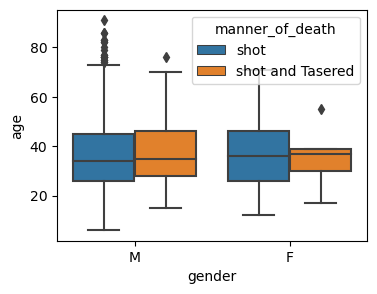

In [7]:
plt.figure(figsize = (4,3))
sns.boxplot( df_kill.gender, df_kill.age, hue= df_kill.manner_of_death)
plt.show()

In [8]:
df_kill.isnull().all()

id                         False
name                       False
date                       False
manner_of_death            False
armed                      False
age                        False
gender                     False
race                       False
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                       False
body_camera                False
dtype: bool

In [9]:
df_kill.dropna(inplace=True) #no null values,faulty task?

In [10]:
# with seaborn

## 1b: Swarm Plot 

#### INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

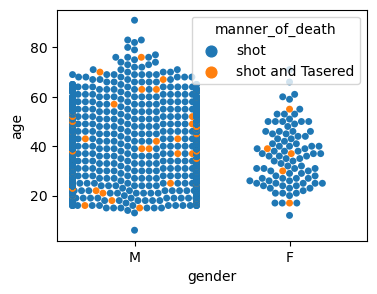

In [11]:
plt.figure(figsize = (4,3))
sns.swarmplot(df_kill.gender, df_kill.age, hue = df_kill.manner_of_death)
plt.show()

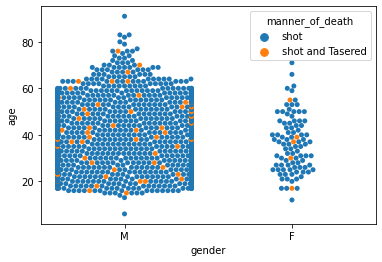

In [ ]:
# with seaborn

## 2: Plot 12 most dangerous cities

In [12]:
data = df_kill["city"].value_counts().nlargest(12)
data

Los Angeles     35
Phoenix         28
Houston         24
Chicago         22
Austin          18
Las Vegas       17
Columbus        16
Miami           15
San Antonio     15
Indianapolis    14
St. Louis       14
Bakersfield     13
Name: city, dtype: int64

Los Angeles      35
Phoenix          28
Houston          24
Chicago          22
Austin           18
Las Vegas        17
Columbus         16
Miami            15
San Antonio      15
St. Louis        14
Indianapolis     14
Oklahoma City    13
Name: city, dtype: int64

In [13]:
df_kill["city"].value_counts().nlargest(12).values

array([35, 28, 24, 22, 18, 17, 16, 15, 15, 14, 14, 13], dtype=int64)

In [14]:
df_kill["city"].value_counts().nlargest(12).index

Index(['Los Angeles', 'Phoenix', 'Houston', 'Chicago', 'Austin', 'Las Vegas',
       'Columbus', 'Miami', 'San Antonio', 'Indianapolis', 'St. Louis',
       'Bakersfield'],
      dtype='object')

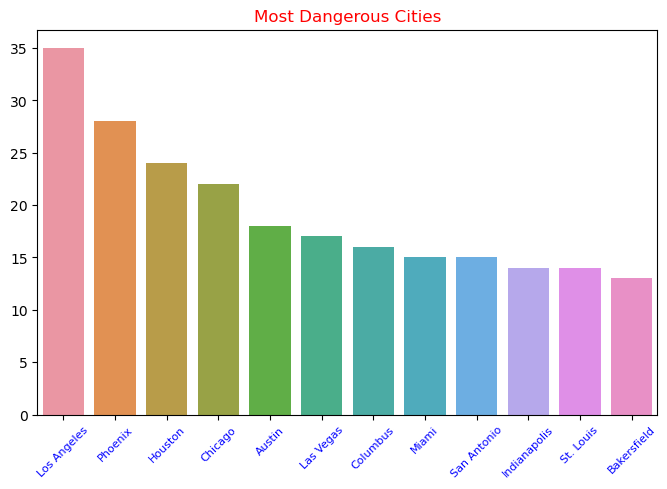

In [15]:
plt.figure(figsize= (8,5))
sns.barplot(x = data.index, y = data.values, hue= data. index, dodge=False)
plt.title("Most Dangerous Cities", color="red")
plt.legend([], [], frameon=False)
plt.xticks(rotation=45, color = "blue", fontsize = 8)

plt.show()

city
Los Angeles     39
Phoenix         31
Houston         27
Chicago         25
Las Vegas       21
San Antonio     20
Columbus        19
Miami           18
Austin          18
St. Louis       15
Albuquerque     14
Indianapolis    14
Name: city, dtype: int64

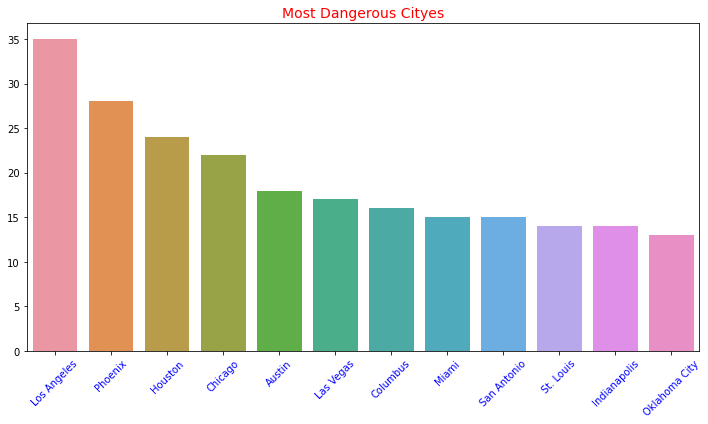

In [ ]:
# with seaborn

Los Angeles      35
Phoenix          28
Houston          24
Chicago          22
Austin           18
Las Vegas        17
Columbus         16
Miami            15
San Antonio      15
St. Louis        14
Indianapolis     14
Oklahoma City    13
Name: city, dtype: int64

Index(['Los Angeles', 'Phoenix', 'Houston', 'Chicago', 'Austin', 'Las Vegas',
       'Columbus', 'Miami', 'San Antonio', 'St. Louis', 'Indianapolis',
       'Oklahoma City'],
      dtype='object')

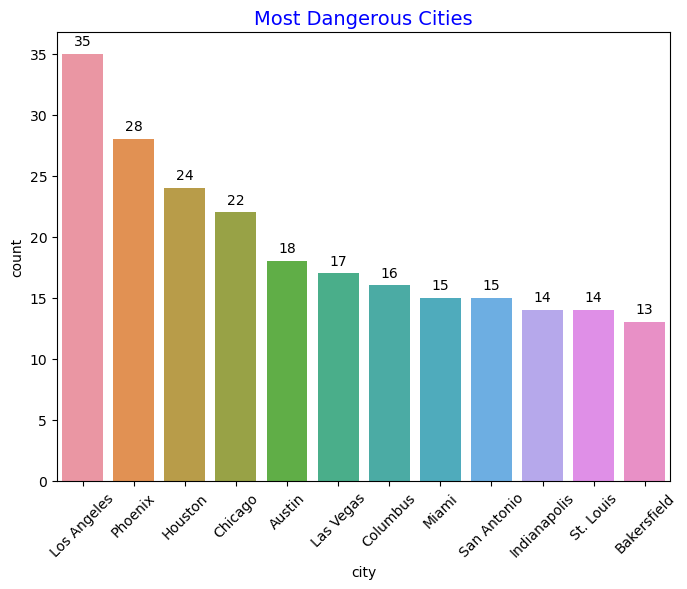

In [53]:
fig, ax = plt.subplots(figsize=(7,6))
ax = sns.countplot(x=df_kill.city, data=df_kill, order= data.index)

for container in ax.containers:
    ax.bar_label(container, fmt='%g', label_type='edge', fontsize=10, color='black', padding=4)
    
ax.set_xticklabels(data.index, rotation=45)
ax.set_title("Most Dangerous Cities", fontsize=14, color="b")

plt.tight_layout()

In [1]:
# with seaborn countplot


## 3: Plot 20 most dangerous states

In [18]:
data2 = df_kill["state"].value_counts().head(20)
data2

CA    366
TX    200
FL    136
AZ    105
OH     70
NC     66
OK     65
CO     63
GA     61
MO     58
TN     56
IL     56
WA     51
LA     47
AL     45
PA     45
NY     43
VA     43
WI     42
NM     41
Name: state, dtype: int64

CA    366
TX    200
FL    136
AZ    105
OH     70
NC     66
OK     65
CO     63
GA     61
MO     58
TN     56
IL     56
WA     51
LA     47
AL     45
PA     45
VA     43
NY     43
WI     42
NM     41
Name: state, dtype: int64

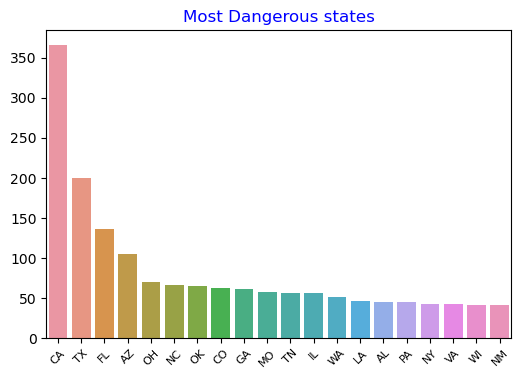

In [19]:
plt.figure(figsize= (6,4))
sns.barplot(x = data2.index, y = data2.values, hue= data2. index, dodge=False)
plt.title("Most Dangerous states", color="blue")
plt.legend([], [], frameon=False)
plt.xticks(rotation=45, fontsize = 8)

plt.show()

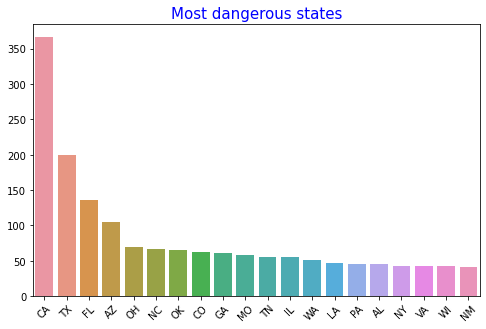

In [ ]:
# with seaborn barplot

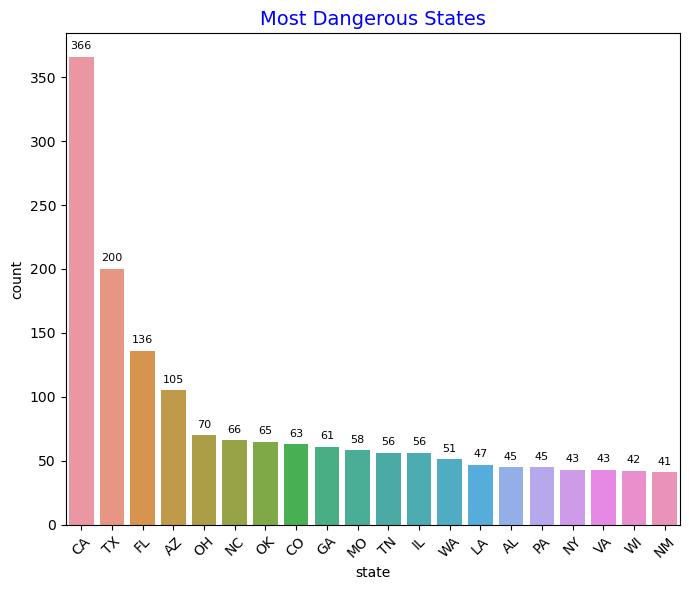

In [52]:
fig, ax = plt.subplots(figsize=(7,6))
ax = sns.countplot(x=df_kill.state, data=df_kill, order= data2.index)

for container in ax.containers:
    ax.bar_label(container, fmt='%g', label_type='edge', fontsize=8, color='black', padding=4)
    
ax.set_xticklabels(data2.index, rotation=45)
ax.set_title("Most Dangerous States", fontsize=14, color="b")

plt.tight_layout()

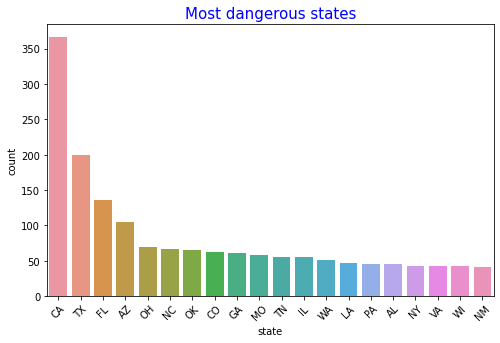

In [ ]:
# with seaborn countplot

## 4: Plot Having mental ilness or not for killed people

In [40]:
df_kill.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2254 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2254 non-null   int64  
 1   name                     2254 non-null   object 
 2   date                     2254 non-null   object 
 3   manner_of_death          2254 non-null   object 
 4   armed                    2254 non-null   object 
 5   age                      2254 non-null   float64
 6   gender                   2254 non-null   object 
 7   race                     2254 non-null   object 
 8   city                     2254 non-null   object 
 9   state                    2254 non-null   object 
 10  signs_of_mental_illness  2254 non-null   bool   
 11  threat_level             2254 non-null   object 
 12  flee                     2254 non-null   object 
 13  body_camera              2254 non-null   bool   
dtypes: bool(2), float64(1), 

In [41]:
df_kill[df_kill["date"] == "02/01/15"].head(2)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False


,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False


In [46]:
data3 = df_kill["signs_of_mental_illness"].value_counts()
data3

False    1681
True      573
Name: signs_of_mental_illness, dtype: int64

False    1681
True      573
Name: signs_of_mental_illness, dtype: int64

In [200]:
#with seaborn barplot

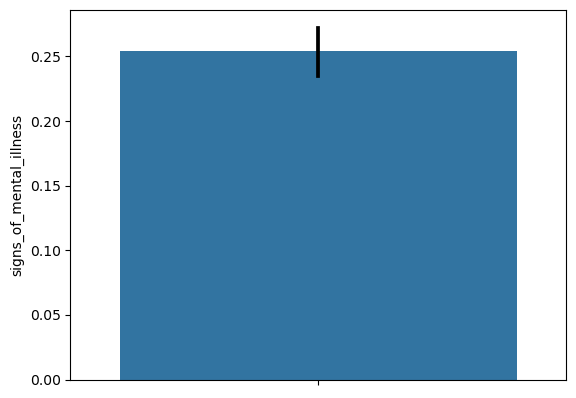

In [65]:
ax= sns.barplot(y="signs_of_mental_illness",  data=df_kill, errcolor="black")  # ci=None

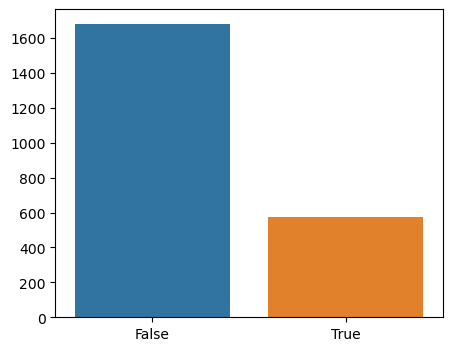

In [48]:
fig, ax = plt.subplots(figsize = (5,4))
ax = sns.barplot(x = data3.index,y = data3.values, hue = data3.index, dodge = False )
plt.legend([], [], frameon=False)
plt.show()

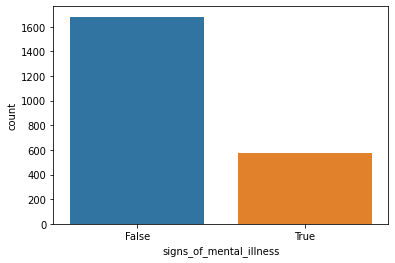

In [ ]:
# with seaborn

## 5: Plot number of Threat Types

In [49]:
data4 = df_kill["threat_level"].value_counts()
data4

attack          1462
other            677
undetermined     115
Name: threat_level, dtype: int64

attack          1462
other            677
undetermined     115
Name: threat_level, dtype: int64

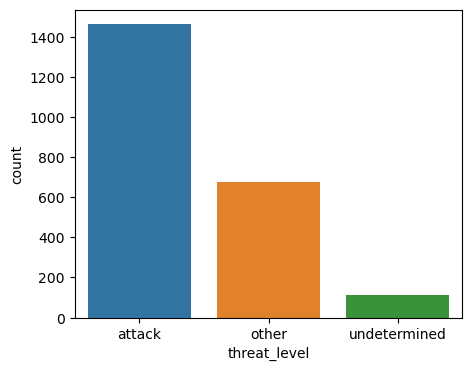

In [58]:
fig, ax = plt.subplots(figsize=(5,4))

ax= sns.countplot(x=df_kill.threat_level, data=df_kill)



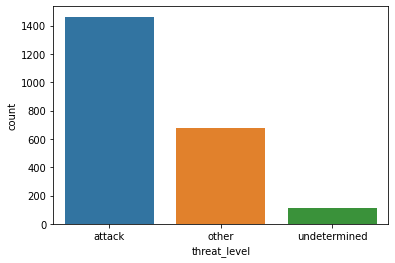

In [ ]:
# with seaborn

## 6: Plot number of Flee Types

In [60]:
data5 = df_kill["flee"].value_counts()
data5

Not fleeing    1528
Car             360
Foot            278
Other            88
Name: flee, dtype: int64

Not fleeing    1528
Car             360
Foot            278
Other            88
Name: flee, dtype: int64

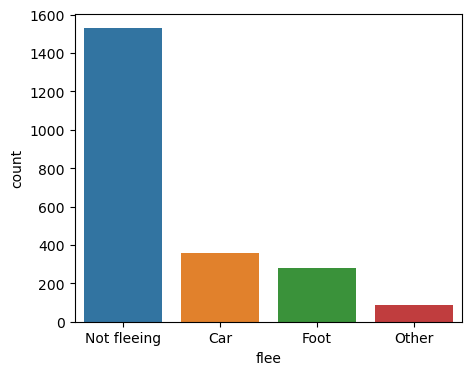

In [63]:
plt.figure(figsize=(5,4)) 
sns.barplot(x=data5.index, y=data5.values)
plt.xlabel("flee")
plt.ylabel("count")
plt.show()

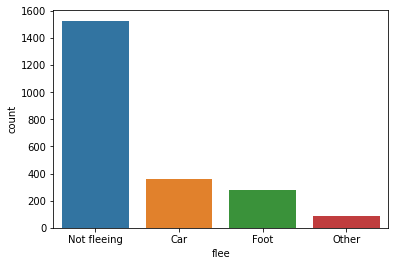

In [ ]:
# with seaborn

# Congratulations

<p style="text-align: center;"><img src="https://lms.techproeducation.com/pluginfile.php/1/theme_edumy/headerlogo2/1663129929/logo.png" class="img-fluid" alt="CLRSWY"></p>